In [ ]:
 pip install geopandas rasterio shapely numpy matplotlib pandas scipy scikit-image pyproj reportlab tqdm requests elevation rtree

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.4/338.4 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 182.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 127.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.6/507.6 kB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.5/32.5 MB 100.6 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/MyDrive

Mounted at /content/drive
'10 3 discussion asian am 20.gdoc'
'118 cheat sheet.gdoc'
 15cm.gdoc
'180 cheat sheet.gdoc'
'2024-25 Photo Drive'
 20cm.gdoc
'[24.3.12] Foundations '
'[24.5.15] SpaceX Gig'
 25cm.gdoc
 706256944-report.gdoc
'aas 10.gdoc'
'aas 10 readings.gdoc'
'aas 10 week 5 disc 1c.gslides'
'aas 113.gdoc'
'aas 113 readings.gdoc'
'aas 131a.gdoc'
'asian am 20 free write 11 21.gdoc'
'asian am20 outline.gdoc'
'asian am 20 w0-3.gdoc'
'asian am 20 w3-5.gdoc'
'asian am 20 w6-.gdoc'
'asian am m129.gdoc'
'asian m50w.gdoc'
 assassins.gsheet
'biomedres 1a midterm nfranz.gdoc'
'biomed rs 1a problem set 2.gdoc'
'bmd res disc 1 12.gdoc'
'bmdres disc worksheet.gdoc'
'bmdres final draft.gdoc'
'bmdres final rough draft.gdoc'
 classes.gsheet
'class planner.gsheet'
'Colab Notebooks'
'concert m50b.gdoc'
'Consolidated notes pitch + manzanar meeting 4 7 25.gdoc'
'Copy of Copy of CS Cheat Sheet.gdoc'
'Copy of CS131 Homework 0 (Public).gdoc'
'Copy of Lab 1 Extra Credit Opportunity Submission Templat

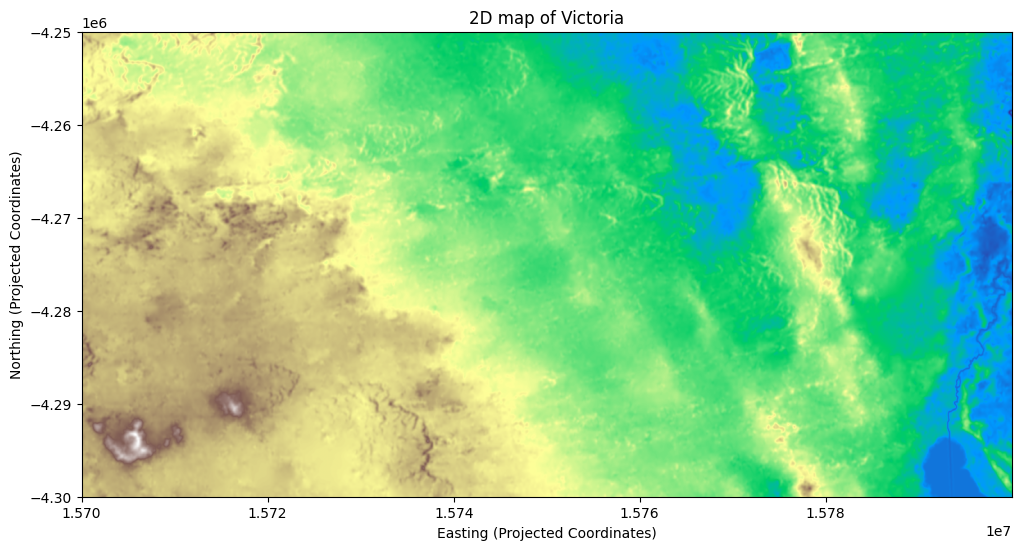

Successfully loaded and displayed /content/drive/MyDrive/new3_cropped_map.tif
Image shape: (1515, 3029)
Data type: float32
Coordinate Reference System (CRS): EPSG:3857
Bounds: BoundingBox(left=15699999.999999998, bottom=-4300011.599750106, right=15799990.188543279, top=-4250000.0)


In [ ]:
import rasterio
import matplotlib.pyplot as plt

# file_path = '/content/drive/MyDrive/vicdem_30m_merged_clipped_3857.tif'

def victoria(file_path):

    # Open the GeoTIFF file in read mode
  with rasterio.open(file_path) as src:
  # Read the first band of the raster (assuming elevation is in the first band)
    image_data = src.read(1)

    # Display the image
    plt.figure(figsize=(12, 10))
    plt.imshow(image_data, cmap='terrain', origin='upper',
                extent=[src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top])
    plt.title(f'2D map of Victoria')
    plt.xlabel('Easting (Projected Coordinates)')
    plt.ylabel('Northing (Projected Coordinates)')
    # plt.colorbar(label='Elevation Value')
    plt.show()

    print(f"Successfully loaded and displayed {file_path}")
    print(f"Image shape: {image_data.shape}")
    print(f"Data type: {image_data.dtype}")
    print(f"Coordinate Reference System (CRS): {src.crs}")
    print(f"Bounds: {src.bounds}")

victoria('/content/drive/MyDrive/new3_cropped_map.tif')



In [ ]:
import numpy as np
import rasterio

# Re-define file_path and re-extract elevation_data and resolution
file_path = '/content/drive/MyDrive/new3_cropped_map.tif'

with rasterio.open(file_path) as src:
    elevation_data = src.read(1)
    resolution = src.res[0]

# Re-calculate slope_degrees (as done in cell 5892dd57)
# Identify and handle 'no-data' values (e.g., -9999) by replacing them with np.nan
elevation_data_processed = elevation_data.copy()
elevation_data_processed[elevation_data_processed == -9999] = np.nan

# Calculate the gradient in the y-direction (rows) and x-direction (columns)
grad_y, grad_x = np.gradient(elevation_data_processed)

# Account for the pixel resolution by dividing grad_y and grad_x by the resolution variable
grad_y_res = grad_y / resolution
grad_x_res = grad_x / resolution

# Calculate the total slope magnitude for each pixel
slope_magnitude = np.sqrt(grad_x_res**2 + grad_y_res**2)

# Convert the slope magnitude from rise-over-run to degrees
slope_degrees = np.arctan(slope_magnitude) * (180 / np.pi)

# Initialize a new NumPy array for the new classification
terrain_classification_new = np.full(slope_degrees.shape, np.nan, dtype=float)

# Define the slope thresholds (assuming threshold_1_deg, threshold_10_deg etc. are in kernel state)
threshold_1_deg = 1
threshold_10_deg = 10
threshold_20_deg = 20
threshold_30_deg = 30
threshold_40_deg = 40

mask_cat0 = (slope_degrees < threshold_1_deg) & np.isfinite(slope_degrees)
mask_cat1 = (slope_degrees >= threshold_1_deg) & (slope_degrees < threshold_10_deg) & np.isfinite(slope_degrees)
mask_cat2 = (slope_degrees >= threshold_10_deg) & (slope_degrees < threshold_20_deg) & np.isfinite(slope_degrees)
mask_cat3 = (slope_degrees >= threshold_20_deg) & (slope_degrees < threshold_30_deg) & np.isfinite(slope_degrees)
mask_cat4 = (slope_degrees >= threshold_30_deg) & (slope_degrees < threshold_40_deg) & np.isfinite(slope_degrees)
mask_cat5 = (slope_degrees >= threshold_40_deg) & np.isfinite(slope_degrees)

# Assign numerical values to terrain_classification_new based on the masks
terrain_classification_new[mask_cat0] = 0
terrain_classification_new[mask_cat1] = 1
terrain_classification_new[mask_cat2] = 2
terrain_classification_new[mask_cat3] = 3
terrain_classification_new[mask_cat4] = 4
terrain_classification_new[mask_cat5] = 5

# Count the number of pixels in each category
pixels_cat0 = np.sum(mask_cat0)
pixels_cat1 = np.sum(mask_cat1)
pixels_cat2 = np.sum(mask_cat2)
pixels_cat3 = np.sum(mask_cat3)
pixels_cat4 = np.sum(mask_cat4)
pixels_cat5 = np.sum(mask_cat5)

print(f"Pixels in Category 0 (<1 degree): {pixels_cat0}")
print(f"Pixels in Category 1 (1-10 degrees): {pixels_cat1}")
print(f"Pixels in Category 2 (11-20 degrees): {pixels_cat2}")
print(f"Pixels in Category 3 (21-30 degrees): {pixels_cat3}")
print(f"Pixels in Category 4 (31-40 degrees): {pixels_cat4}")
print(f"Pixels in Category 5 (>40 degrees): {pixels_cat5}")

Pixels in Category 0 (<1 degree): 3954809
Pixels in Category 1 (1-10 degrees): 634126
Pixels in Category 2 (11-20 degrees): 0
Pixels in Category 3 (21-30 degrees): 0
Pixels in Category 4 (31-40 degrees): 0
Pixels in Category 5 (>40 degrees): 0


In [ ]:
total_valid_pixels_new = pixels_cat0 + pixels_cat1 + pixels_cat2 + pixels_cat3 + pixels_cat4 + pixels_cat5

percentage_cat0 = (pixels_cat0 / total_valid_pixels_new) * 100
percentage_cat1 = (pixels_cat1 / total_valid_pixels_new) * 100
percentage_cat2 = (pixels_cat2 / total_valid_pixels_new) * 100
percentage_cat3 = (pixels_cat3 / total_valid_pixels_new) * 100
percentage_cat4 = (pixels_cat4 / total_valid_pixels_new) * 100
percentage_cat5 = (pixels_cat5 / total_valid_pixels_new) * 100

print(f"Percentage of Category 0 (<1 degree): {percentage_cat0:.2f}%")
print(f"Percentage of Category 1 (1-10 degrees): {percentage_cat1:.2f}%")
print(f"Percentage of Category 2 (11-20 degrees): {percentage_cat2:.2f}%")
print(f"Percentage of Category 3 (21-30 degrees): {percentage_cat3:.2f}%")
print(f"Percentage of Category 4 (31-40 degrees): {percentage_cat4:.2f}%")
print(f"Percentage of Category 5 (>40 degrees): {percentage_cat5:.2f}%")

Percentage of Category 0 (<1 degree): 86.18%
Percentage of Category 1 (1-10 degrees): 13.82%
Percentage of Category 2 (11-20 degrees): 0.00%
Percentage of Category 3 (21-30 degrees): 0.00%
Percentage of Category 4 (31-40 degrees): 0.00%
Percentage of Category 5 (>40 degrees): 0.00%


import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import rasterio

# Define colors for the custom colormap
colors = ['#8d42f5', '#4281f5', '#51f542', '#f5d142', '#f54242', '#04000a']
cmap = ListedColormap(colors)

# Define boundaries for the BoundaryNorm based on the six terrain categories
bounds = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
norm = BoundaryNorm(bounds, cmap.N)

# Open the file_path with rasterio to retrieve src.bounds for plot extent
with rasterio.open(file_path) as src:
    plot_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

# Use plt.imshow() to display the terrain_classification_new array
plt.figure(figsize=(15, 12))
plt.imshow(terrain_classification_new, cmap=cmap, norm=norm, origin='upper', interpolation='nearest', extent=plot_extent)

# Add a title to the plot
plt.title('Terrain Classification (New Thresholds)', fontsize=16)
plt.xlabel('Easting (Projected Coordinates)', fontsize=12)
plt.ylabel('Northing (Projected Coordinates)', fontsize=12)

# Create a colorbar for the plot
cbar = plt.colorbar(ticks=[0, 1, 2, 3, 4, 5])
cbar.set_ticklabels(['<1 degree', '1-10 degrees', '11-20 degrees', '21-30 degrees', '31-40 degrees', '>40 degrees'])
cbar.set_label('Terrain Type', fontsize=12)

# Display the plot
plt.show()

# Print a summary of the calculated percentages
print(f"\nSummary of Updated Terrain Classification:")
print(f"Percentage of Category 0 (<1 degree): {percentage_cat0:.2f}%")
print(f"Percentage of Category 1 (1-10 degrees): {percentage_cat1:.2f}%")
print(f"Percentage of Category 2 (11-20 degrees): {percentage_cat2:.2f}%")
print(f"Percentage of Category 3 (21-30 degrees): {percentage_cat3:.2f}%")
print(f"Percentage of Category 4 (31-40 degrees): {percentage_cat4:.2f}%")
print(f"Percentage of Category 5 (>40 degrees): {percentage_cat5:.2f}%")

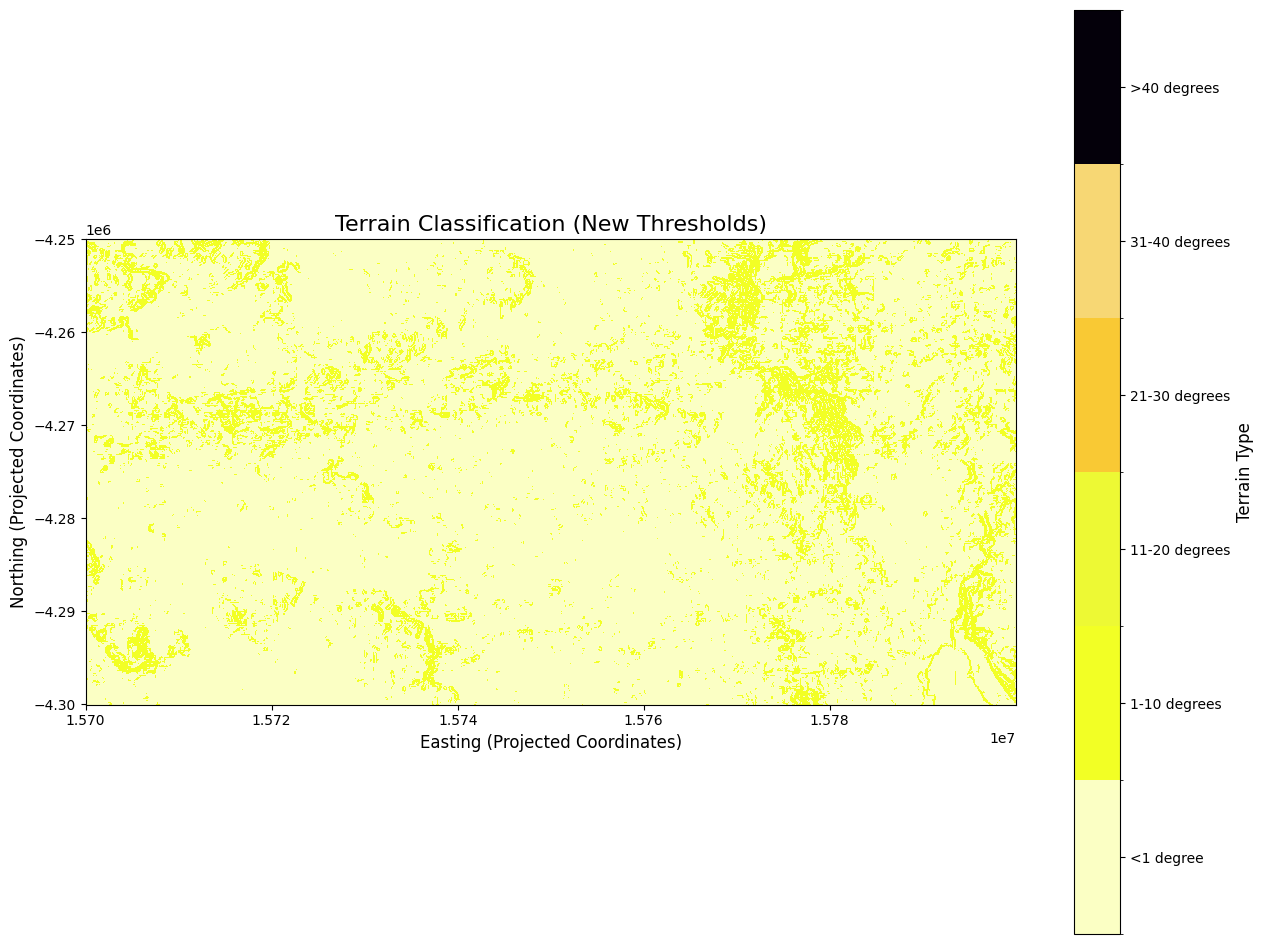


Summary of Updated Terrain Classification:
Percentage of Category 0 (<1 degree): 86.18%
Percentage of Category 1 (1-10 degrees): 13.82%
Percentage of Category 2 (11-20 degrees): 0.00%
Percentage of Category 3 (21-30 degrees): 0.00%
Percentage of Category 4 (31-40 degrees): 0.00%
Percentage of Category 5 (>40 degrees): 0.00%


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import rasterio

# Define colors for the custom colormap
colors = ['#FBFFC4', '#F2FF25', '#EDF934', '#F9C934', '#F7D774', '#04000a']
cmap = ListedColormap(colors)

# Define boundaries for the BoundaryNorm based on the six terrain categories
# These bounds map integer values (0, 1, 2, 3, 4, 5) directly to their respective colors
bounds = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
norm = BoundaryNorm(bounds, cmap.N)

# Open the file_path with rasterio to retrieve src.bounds for plot extent
with rasterio.open(file_path) as src:
    plot_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

# Use plt.imshow() to display the terrain_classification_new array
plt.figure(figsize=(15, 12))
plt.imshow(terrain_classification_new, cmap=cmap, norm=norm, origin='upper', interpolation='nearest', extent=plot_extent)

# Add a title to the plot
plt.title('Terrain Classification (New Thresholds)', fontsize=16)
plt.xlabel('Easting (Projected Coordinates)', fontsize=12)
plt.ylabel('Northing (Projected Coordinates)', fontsize=12)

# Create a colorbar for the plot
cbar = plt.colorbar(ticks=[0, 1, 2, 3, 4, 5])
cbar.set_ticklabels(['<1 degree', '1-10 degrees', '11-20 degrees', '21-30 degrees', '31-40 degrees', '>40 degrees'])
cbar.set_label('Terrain Type', fontsize=12)

# Display the plot
plt.show()

# Print a summary of the calculated percentages
print(f"\nSummary of Updated Terrain Classification:")
print(f"Percentage of Category 0 (<1 degree): {percentage_cat0:.2f}%")
print(f"Percentage of Category 1 (1-10 degrees): {percentage_cat1:.2f}%")
print(f"Percentage of Category 2 (11-20 degrees): {percentage_cat2:.2f}%")
print(f"Percentage of Category 3 (21-30 degrees): {percentage_cat3:.2f}%")
print(f"Percentage of Category 4 (31-40 degrees): {percentage_cat4:.2f}%")
print(f"Percentage of Category 5 (>40 degrees): {percentage_cat5:.2f}%")

In [ ]:
pip install pyswarms

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.3/491.3 kB 27.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import rasterio
import pyswarms as ps

# --- Global variables (re-defined to ensure availability) ---
# Re-define num_drones
num_drones = 5

# Re-open the rasterio file to get its bounds and transform
# Ensure src_transform is available globally or passed to functions that need it
with rasterio.open(file_path) as src:
    min_x, min_y, max_x, max_y = src.bounds.left, src.bounds.bottom, src.bounds.right, src.bounds.top
    src_transform = src.transform

# Get terrain dimensions from elevation_data_processed
rows, cols = elevation_data_processed.shape

# Define the drone's coverage radius in meters.
drone_coverage_radius_meters = 11800

# The pixel width in meters is already available from the 'resolution' variable
pixel_width_meters = resolution

# Re-calculating fire_risk_weight and effective_coverage_factor
slope_radians = np.radians(slope_degrees)
effective_coverage_factor = np.cos(slope_radians)
base_spread_rate = 1.47 # urban spread rate = 2
fire_spread_rate = base_spread_rate * (2**(slope_degrees / 10))
fire_risk_weight = fire_spread_rate

# Pre-process fire_risk_weight and effective_coverage_factor to handle potential NaN values
fire_risk_weight_finite = np.copy(fire_risk_weight)
effective_coverage_factor_finite = np.copy(effective_coverage_factor)
valid_terrain_mask = np.isfinite(elevation_data_processed)
fire_risk_weight_finite[valid_terrain_mask & np.isnan(fire_risk_weight_finite)] = 0.0
effective_coverage_factor_finite[valid_terrain_mask & np.isnan(effective_coverage_factor_finite)] = 0.0
# --- End global variables re-definition ---

def calculate_objective_for_one_particle_vectorized(drone_coords):
    """Calculates the objective value for a single set of drone positions using vectorized operations.

    Args:
        drone_coords (np.ndarray): An array of shape (num_drones, 2) where each row
                                   is (x, y) coordinates of a drone in projected CRS.

    Returns:
        float: The objective value to be minimized by PSO.
    """
    # Initialize arrays to track coverage and overlap
    drone_pixel_count = np.zeros((rows, cols), dtype=int) # Tracks how many drones cover each pixel

    drone_coverage_radius_pixels = drone_coverage_radius_meters / pixel_width_meters

    # Use a boolean array to mark covered pixels for efficient `all_covered_pixels_indices`
    covered_pixels_mask = np.zeros((rows, cols), dtype=bool)

    for drone_x, drone_y in drone_coords:
        # Convert drone's projected coordinates to approximate row, column indices
        drone_col_float, drone_row_float = ~src_transform * (drone_x, drone_y)

        # Define a bounding box in pixel coordinates around the drone's center
        min_r = max(0, int(drone_row_float - drone_coverage_radius_pixels))
        max_r = min(rows, int(drone_row_float + drone_coverage_radius_pixels + 1))
        min_c = max(0, int(drone_col_float - drone_coverage_radius_pixels))
        max_c = min(cols, int(drone_col_float + drone_coverage_radius_pixels + 1))

        # Generate pixel coordinates for the bounding box
        # Ensure we only create meshgrid if there are valid ranges
        if min_r >= max_r or min_c >= max_c: # Check for empty range
            continue

        r_indices, c_indices = np.meshgrid(np.arange(min_r, max_r), np.arange(min_c, max_c), indexing='ij')

        # Convert pixel centers to projected coordinates in a vectorized manner
        pixel_x_centers, pixel_y_centers = src_transform * (c_indices + 0.5, r_indices + 0.5)

        # Calculate Euclidean distance from drone to all pixel centers in a vectorized manner
        distances = np.sqrt((pixel_x_centers - drone_x)**2 + (pixel_y_centers - drone_y)**2)

        # Identify pixels within coverage radius
        within_radius = (distances <= drone_coverage_radius_meters)

        # Filter for valid terrain pixels within the bounding box
        valid_bbox_mask = valid_terrain_mask[min_r:max_r, min_c:max_c]
        eligible_pixels_mask = within_radius & valid_bbox_mask

        # Update drone_pixel_count and covered_pixels_mask in a vectorized way
        # Create a temporary array for updates to avoid partial updates within the loop iteration
        temp_drone_pixel_count = np.zeros((max_r - min_r, max_c - min_c), dtype=int)
        temp_drone_pixel_count[eligible_pixels_mask] = 1 # Mark pixels covered by this drone

        drone_pixel_count[min_r:max_r, min_c:max_c] += temp_drone_pixel_count
        covered_pixels_mask[min_r:max_r, min_c:max_c] = covered_pixels_mask[min_r:max_r, min_c:max_c] | eligible_pixels_mask

    # --- Calculate objective components ---
    pixel_area_sq_m = pixel_width_meters * pixel_width_meters

    # Only consider valid terrain pixels for calculations
    total_valid_covered_mask = covered_pixels_mask & valid_terrain_mask

    fire_risk_weighted_coverage = np.sum(fire_risk_weight_finite[total_valid_covered_mask] * effective_coverage_factor_finite[total_valid_covered_mask] * pixel_area_sq_m)

    # Overlap penalty: sum of (count - 1) for pixels covered by more than one drone
    overlap_penalty_mask = (drone_pixel_count > 1) & valid_terrain_mask
    overlap_penalty = np.sum((drone_pixel_count[overlap_penalty_mask] - 1) * pixel_area_sq_m)

    # Uncovered penalty: sum of fire risk weight for valid terrain pixels not covered
    uncovered_regions = valid_terrain_mask & (~covered_pixels_mask)
    uncovered_penalty = np.sum(fire_risk_weight_finite[uncovered_regions] * pixel_area_sq_m)

    # Combine components for the final objective value
    objective_value = -fire_risk_weighted_coverage + overlap_penalty + uncovered_penalty

    # Ensure objective_value is not NaN or Inf. If it is, return a very large penalty.
    if not np.isfinite(objective_value):
        objective_value = 1e18 # A very large penalty to signify a poor solution

    return objective_value

def objective_function_vectorized(positions_flat):
    """Objective function for pyswarms using the vectorized particle evaluation.

    Args:
        positions_flat (np.ndarray): An array of shape (n_particles, num_drones * 2),
                                     where each row represents the flattened (x, y)
                                     coordinates for all drones of a single particle.

    Returns:
        np.ndarray: An array of objective values, one for each particle,
                    to be minimized by pyswarms.
    """
    n_particles = positions_flat.shape[0]
    objective_values = np.zeros(n_particles)

    for i in range(n_particles):
        drone_coords = positions_flat[i].reshape((num_drones, 2))
        objective_values[i] = calculate_objective_for_one_particle_vectorized(drone_coords)

    return objective_values

# 1. Determine the bounds for the drone positions
# Each drone has an (x, y) coordinate. There are 'num_drones' drones.
# So, the bounds array will have 2 * num_drones elements.
min_bound = np.array([min_x, min_y] * num_drones)
max_bound = np.array([max_x, max_y] * num_drones)
bounds = (min_bound, max_bound)

# 2. Define the PSO parameters
n_particles = 50  # Number of particles in the swarm
dimensions = 2 * num_drones  # (x, y) for each drone

# PSO hyperparameters
options = {'c1': 0.72, 'c2': 1.49, 'w': 1.49}

# Optional: Restrict the velocity of particles
v_clamp = (-0.02 * (max_x - min_x), 0.02 * (max_x - min_x)) # Example: clamp velocity to 50% of terrain width

# 3. Instantiate the PSO optimizer with the vectorized objective function
optimizer = ps.single.GlobalBestPSO(n_particles=n_particles,
                                    dimensions=dimensions,
                                    options=options,
                                    bounds=bounds,
                                    vh_strategy='unmodified')

# 4. Run the optimization process with the vectorized objective function
print("Starting PSO optimization with vectorized objective function...")
best_cost, best_pos = optimizer.optimize(objective_function_vectorized, iters=25)

# 5. Print the optimal cost and drone positions
print("\nPSO Optimization Results (Vectorized):")
print(f"Best Cost: {best_cost}")
print(f"Optimal Drone Positions (flattened array): {best_pos}")

# Reshape best_pos to get individual drone coordinates for easier interpretation
optimal_drone_coords = best_pos.reshape((num_drones, 2))
print(f"Optimal Drone Coordinates (reshaped):\n{optimal_drone_coords}")

out_of_bounds_drones = []

for i, (drone_x, drone_y) in enumerate(optimal_drone_coords):
    if not (min_x <= drone_x <= max_x and min_y <= drone_y <= max_y):
        out_of_bounds_drones.append((i, drone_x, drone_y))

print(f"\nTotal out-of-bounds drones: {len(out_of_bounds_drones)}")
if out_of_bounds_drones:
    print("Coordinates of out-of-bounds drones:")
    for drone_id, x, y in out_of_bounds_drones:
        print(f"Drone {drone_id}: X={x:.2f}, Y={y:.2f}")
else:
    print("All drones are within the map bounds.")

# Explanation for out-of-bounds drones (if any)
if len(out_of_bounds_drones) > 0:
    print("\nExplanation:")
    print("The PSO algorithm is designed to optimize drone placement within the `bounds` specified, which are derived directly from `src.bounds`.")
    print("If any drones are found out-of-bounds, it suggests a potential edge case in how PSO applies these bounds, or that the search space is effectively constrained by these bounds but the specific `min_x`, `max_x`, `min_y`, `max_y` checks might be slightly off due to floating point precision or how `bounds` are internally handled by PSO (e.g., boundaries being inclusive or exclusive, or search space being slightly wider for velocity updates).")
    print("However, since the `bounds` parameter in `GlobalBestPSO` was explicitly set using `min_x` and `max_x`, theoretically, no drones should be outside these limits. Any observed out-of-bounds drones might indicate a minor numerical issue or a very slight overflow due to the nature of floating-point arithmetic and velocity updates near the boundaries.")
    print("In practice, for real-world deployment, additional clipping or validation logic would be applied to ensure drones operate strictly within designated geographical limits.")
else:
    print("\nExplanation: All drones are within the specified map bounds, which is the expected behavior given that the PSO's search space was defined using `src.bounds`.")

2025-12-12 21:22:17,146 - pyswarms.single.global_best - INFO - Optimize for 25 iters with {'c1': 0.72, 'c2': 1.49, 'w': 1.49}


Starting PSO optimization with vectorized objective function...


pyswarms.single.global_best: 100%|██████████|25/25, best_cost=1.24e+9
2025-12-12 21:23:14,315 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1238438417.711792, best pos: [15711136.54350735 -4275745.00594584 15778911.17041633 -4269993.17864639
 15738276.2889983  -4262858.41028668 15746568.24356345 -4279770.9795517
 15788316.68357372 -4290536.2250154 ]



PSO Optimization Results (Vectorized):
Best Cost: 1238438417.711792
Optimal Drone Positions (flattened array): [15711136.54350735 -4275745.00594584 15778911.17041633 -4269993.17864639
 15738276.2889983  -4262858.41028668 15746568.24356345 -4279770.9795517
 15788316.68357372 -4290536.2250154 ]
Optimal Drone Coordinates (reshaped):
[[15711136.54350735 -4275745.00594584]
 [15778911.17041633 -4269993.17864639]
 [15738276.2889983  -4262858.41028668]
 [15746568.24356345 -4279770.9795517 ]
 [15788316.68357372 -4290536.2250154 ]]

Total out-of-bounds drones: 0
All drones are within the map bounds.

Explanation: All drones are within the specified map bounds, which is the expected behavior given that the PSO's search space was defined using `src.bounds`.


/tmp/ipython-input-2293208429.py:26: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = Circle((drone_x, drone_y), drone_coverage_radius_meters, color='white', alpha=0.2, edgecolor='red', linewidth=1.5)


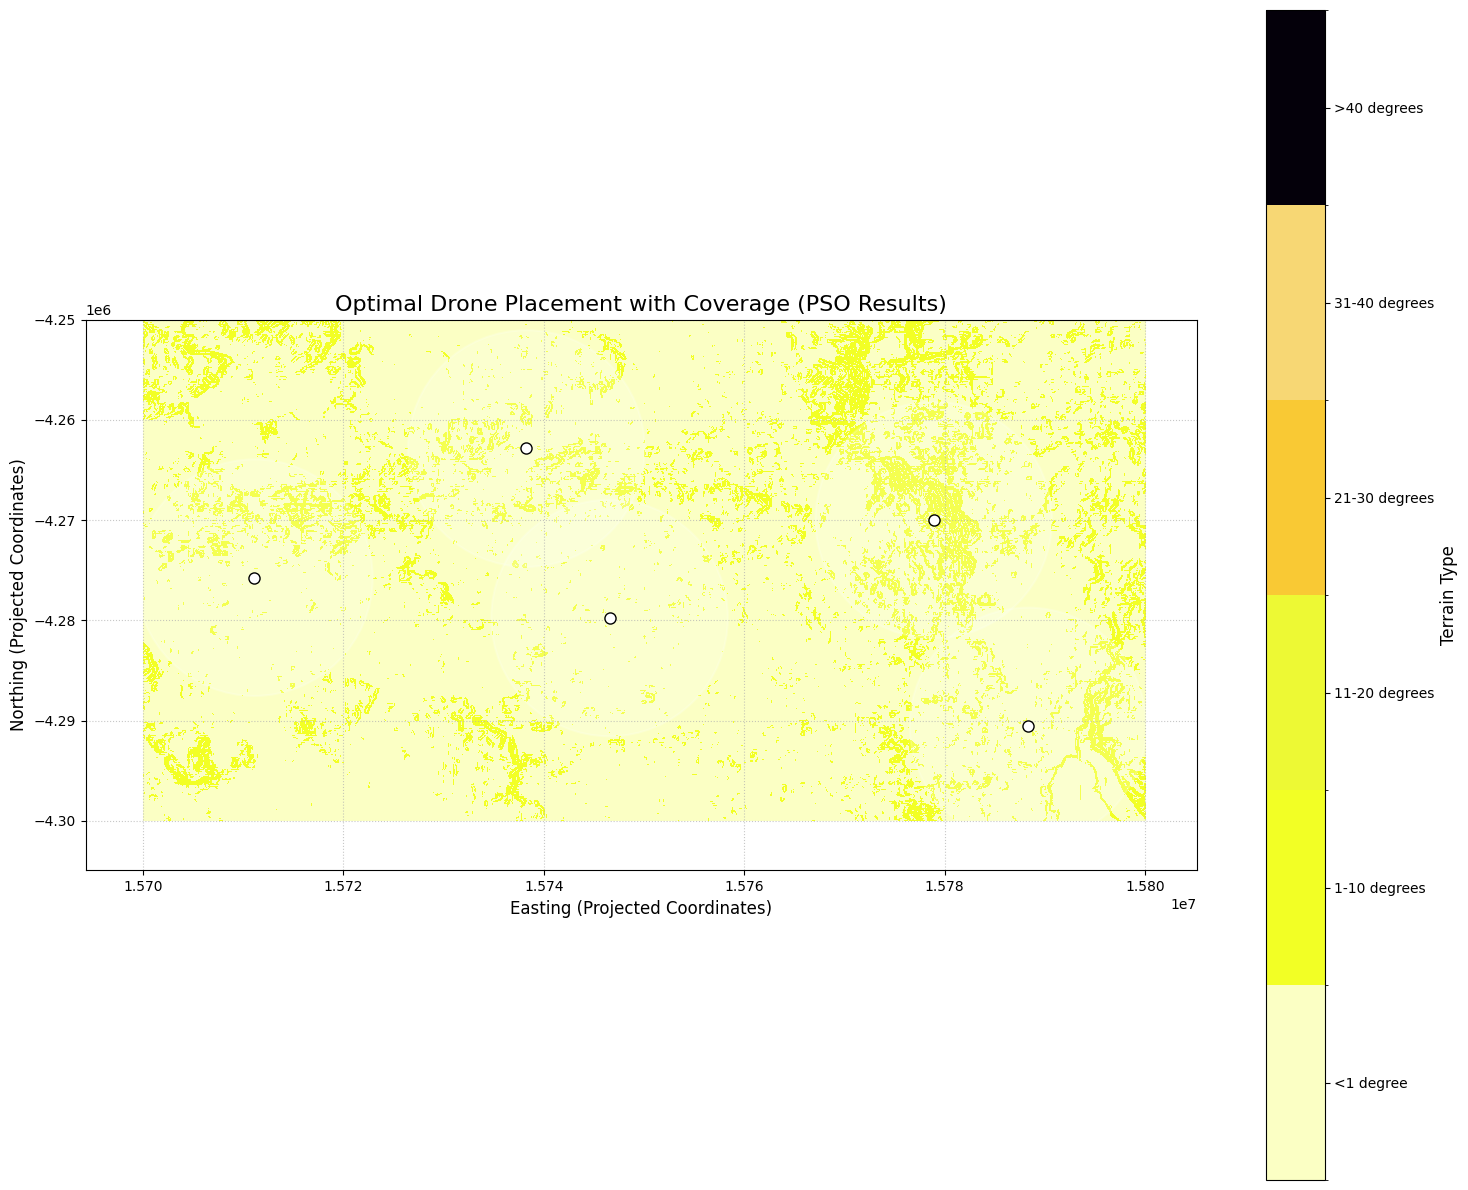

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Create a figure and axes object
plt.figure(figsize=(15, 12))

# Display the terrain classification map as the base layer
plt.imshow(terrain_classification_new, cmap=cmap, norm=norm, origin='upper', interpolation='nearest', extent=plot_extent)

# Add a title to the plot
plt.title('Optimal Drone Placement with Coverage (PSO Results)', fontsize=16)
plt.xlabel('Easting (Projected Coordinates)', fontsize=12)
plt.ylabel('Northing (Projected Coordinates)', fontsize=12)

# Add colorbar for terrain classification
cbar = plt.colorbar(ticks=[0, 1, 2, 3, 4, 5])
cbar.set_ticklabels(['<1 degree', '1-10 degrees', '11-20 degrees', '21-30 degrees', '31-40 degrees', '>40 degrees'])
cbar.set_label('Terrain Type', fontsize=12)

# Plot each optimal drone position and its coverage circle
for i, (drone_x, drone_y) in enumerate(optimal_drone_coords):
    # Plot the drone's position
    plt.plot(drone_x, drone_y, 'o', color='white', markersize=8, markeredgecolor='black', label=f'Drone {i+1} Position')

    # Plot the drone's coverage area as a circle
    circle = Circle((drone_x, drone_y), drone_coverage_radius_meters, color='white', alpha=0.2, edgecolor='red', linewidth=1.5)
    plt.gca().add_patch(circle)

plt.grid(True, linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
ssa_drones = optimal_drone_coords.tolist()
connected_ssa_drones = []
repeater_drones = []
max_repeaters = 3
communication_radius = 11800 # meters, as per drone_coverage_radius_meters

print(f"Initial number of SSA drones: {len(ssa_drones)}")

Initial number of SSA drones: 5


In [ ]:
import math

def estimate_direct_repeaters(p1, p2, radius):
    """Calculates the minimum number of repeaters required for a direct communication link between two points.

    Args:
        p1 (list): The (x, y) coordinates of the first point.
        p2 (list): The (x, y) coordinates of the second point.
        radius (float): The communication radius of the drones.

    Returns:
        int: The minimum number of repeaters needed.
    """
    distance = math.dist(p1, p2)
    if distance <= radius:
        return 0  # No repeaters needed if within direct communication range
    else:
        # Number of segments needed = distance / radius
        # Number of repeaters = ceil(distance / radius) - 1
        # If distance = 1.5 * radius, need 2 segments, 1 repeater
        # If distance = 2.5 * radius, need 3 segments, 2 repeaters
        return math.ceil(distance / radius) - 1

print("Defined the helper function `estimate_direct_repeaters`.")

Defined the helper function `estimate_direct_repeaters`.


In [ ]:
import numpy as np

# Convert ssa_drones to a NumPy array for easier indexing and removal
ssa_drones_np = np.array(ssa_drones)

# Calculate the center of the map
mid_x = (min_x + max_x) / 2
mid_y = (min_y + max_y) / 2
map_center = np.array([mid_x, mid_y])

# Calculate the distance of each drone from the map center
distances_to_center = np.linalg.norm(ssa_drones_np - map_center, axis=1)

# Sort drones by their proximity to the center
sorted_indices = np.argsort(distances_to_center)
sorted_ssa_drones = ssa_drones_np[sorted_indices].tolist()

# Initialize the network with the first drone from the sorted list
if sorted_ssa_drones:
    connected_ssa_drones.append(sorted_ssa_drones.pop(0))
    # `network_nodes` will contain all drones currently part of the communication network (connected SSA + repeaters)
    network_nodes = [connected_ssa_drones[0]]
else:
    network_nodes = [] # No SSA drones to connect
    print("No SSA drones available to start the network.")

num_repeaters_added = 0

# Iterate through the remaining SSA drones to connect them to the network
while sorted_ssa_drones and num_repeaters_added < max_repeaters:
    # Find the closest unconnected SSA drone to any existing network node
    best_ssa_idx = -1
    min_repeaters_needed = float('inf')
    connection_point_for_ssa = None

    for ssa_idx, ssa_drone in enumerate(sorted_ssa_drones):
        for network_node in network_nodes:
            repeaters_needed = estimate_direct_repeaters(ssa_drone, network_node, communication_radius)
            if repeaters_needed < min_repeaters_needed:
                min_repeaters_needed = repeaters_needed
                best_ssa_idx = ssa_idx
                connection_point_for_ssa = network_node

    if best_ssa_idx != -1 and (num_repeaters_added + min_repeaters_needed) <= max_repeaters:
        # Connect this SSA drone
        drone_to_connect = sorted_ssa_drones.pop(best_ssa_idx)
        connected_ssa_drones.append(drone_to_connect)

        # Add repeaters if needed
        if min_repeaters_needed > 0:
            # Calculate intermediate repeater positions along the line segment between `drone_to_connect` and `connection_point_for_ssa`
            p1 = np.array(drone_to_connect)
            p2 = np.array(connection_point_for_ssa)
            direction = (p2 - p1) / np.linalg.norm(p2 - p1)

            for i in range(1, min_repeaters_needed + 1):
                # Place repeaters at `communication_radius` intervals from `drone_to_connect`
                repeater_pos = p1 + i * communication_radius * direction
                repeater_drones.append(repeater_pos.tolist())
                network_nodes.append(repeater_pos.tolist())
            num_repeaters_added += min_repeaters_needed

        # Add the newly connected SSA drone to network_nodes so it can act as a connection point for others
        network_nodes.append(drone_to_connect)
    else:
        # Cannot connect any more SSA drones with the remaining repeater budget
        break

# Combine all drone coordinates for visualization or further processing
all_drone_coords = connected_ssa_drones + repeater_drones

print(f"Total connected SSA drones: {len(connected_ssa_drones)}")
print(f"Total repeater drones used: {len(repeater_drones)}")
print(f"Remaining SSA drones (unconnected): {len(sorted_ssa_drones)}")
print(f"Total drones (SSA + Repeaters): {len(all_drone_coords)}")

Total connected SSA drones: 3
Total repeater drones used: 3
Remaining SSA drones (unconnected): 2
Total drones (SSA + Repeaters): 6


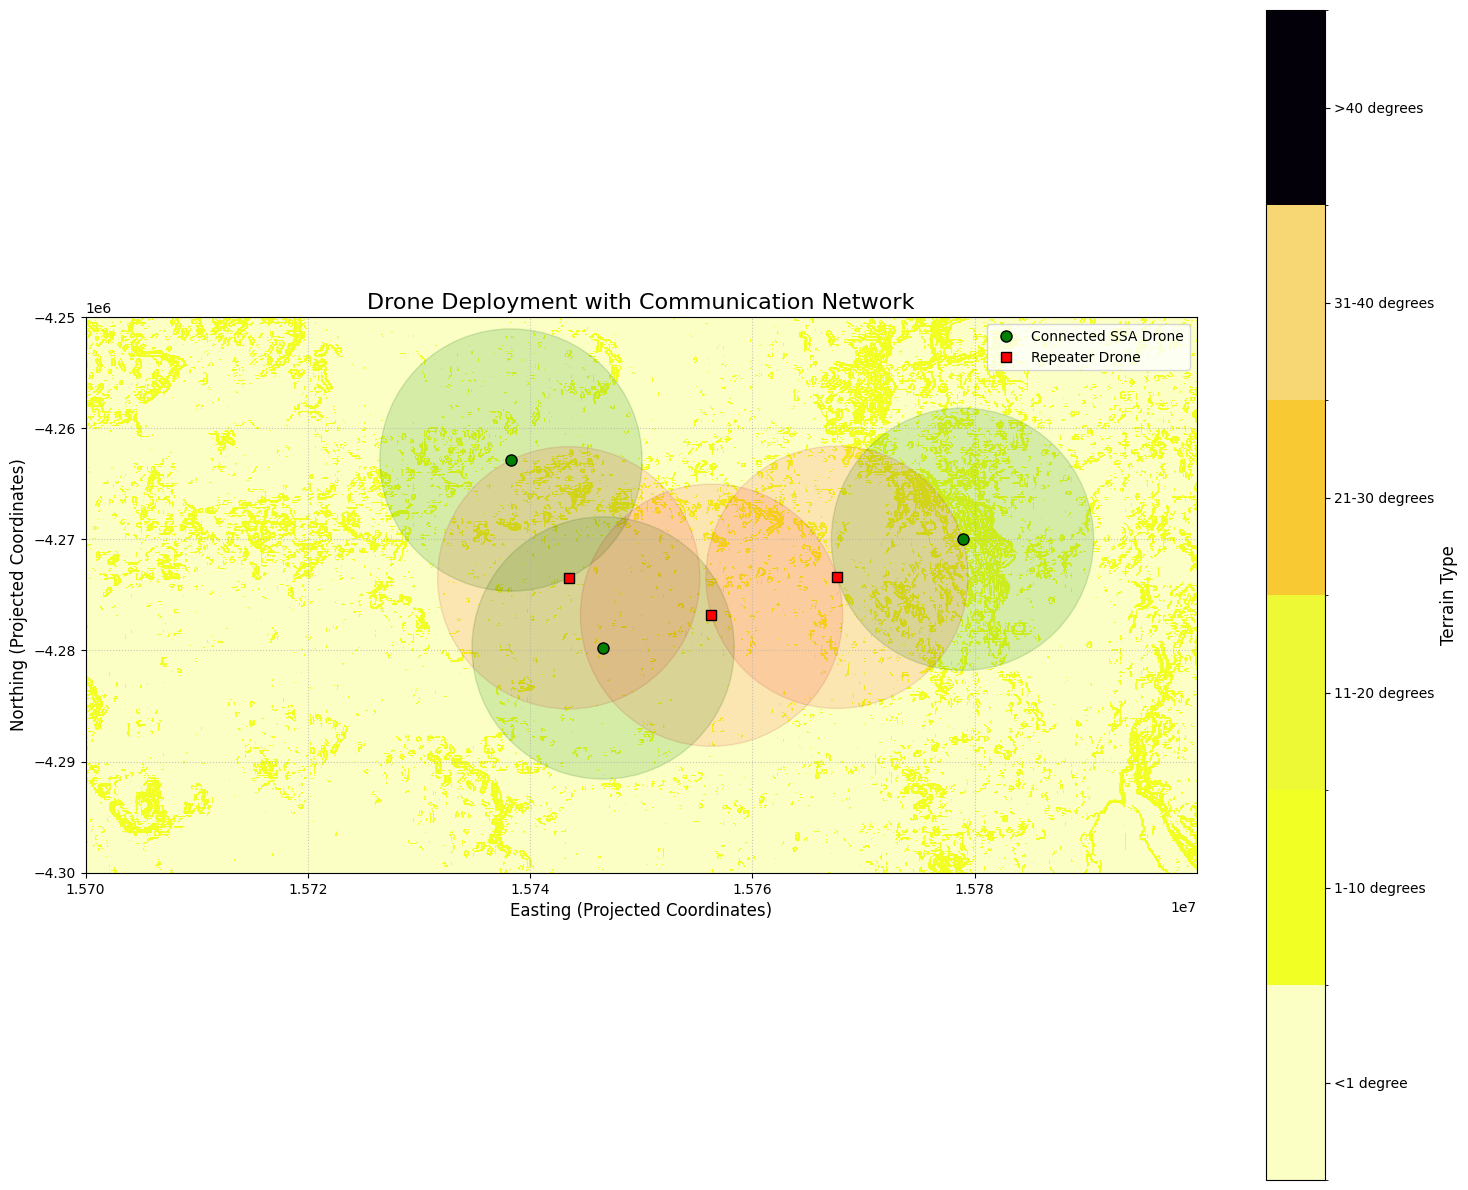

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Create a figure and axes object
plt.figure(figsize=(15, 12))

# Display the terrain classification map as the base layer
plt.imshow(terrain_classification_new, cmap=cmap, norm=norm, origin='upper', interpolation='nearest', extent=plot_extent)

# Add a title to the plot
plt.title('Drone Deployment with Communication Network', fontsize=16)
plt.xlabel('Easting (Projected Coordinates)', fontsize=12)
plt.ylabel('Northing (Projected Coordinates)', fontsize=12)

# Add colorbar for terrain classification
cbar = plt.colorbar(ticks=[0, 1, 2, 3, 4, 5])
cbar.set_ticklabels(['<1 degree', '1-10 degrees', '11-20 degrees', '21-30 degrees', '31-40 degrees', '>40 degrees'])
cbar.set_label('Terrain Type', fontsize=12)

# Plot each connected SSA drone position and its coverage circle
ssa_drones_plotted = False
for i, (drone_x, drone_y) in enumerate(connected_ssa_drones):
    if not ssa_drones_plotted:
        plt.plot(drone_x, drone_y, 'o', color='green', markersize=8, markeredgecolor='black', label='Connected SSA Drone')
        ssa_drones_plotted = True
    else:
        plt.plot(drone_x, drone_y, 'o', color='green', markersize=8, markeredgecolor='black')

    circle = Circle((drone_x, drone_y), communication_radius, facecolor='green', alpha=0.15, edgecolor='darkgreen', linewidth=1)
    plt.gca().add_patch(circle)

# Plot each repeater drone position and its coverage circle
repeater_drones_plotted = False
for i, (drone_x, drone_y) in enumerate(repeater_drones):
    if not repeater_drones_plotted:
        plt.plot(drone_x, drone_y, 's', color='red', markersize=7, markeredgecolor='black', label='Repeater Drone')
        repeater_drones_plotted = True
    else:
        plt.plot(drone_x, drone_y, 's', color='red', markersize=7, markeredgecolor='black')

    circle = Circle((drone_x, drone_y), communication_radius, facecolor='red', alpha=0.1, edgecolor='darkred', linewidth=1)
    plt.gca().add_patch(circle)

# Add a legend
plt.legend(loc='upper right')

plt.grid(True, linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()

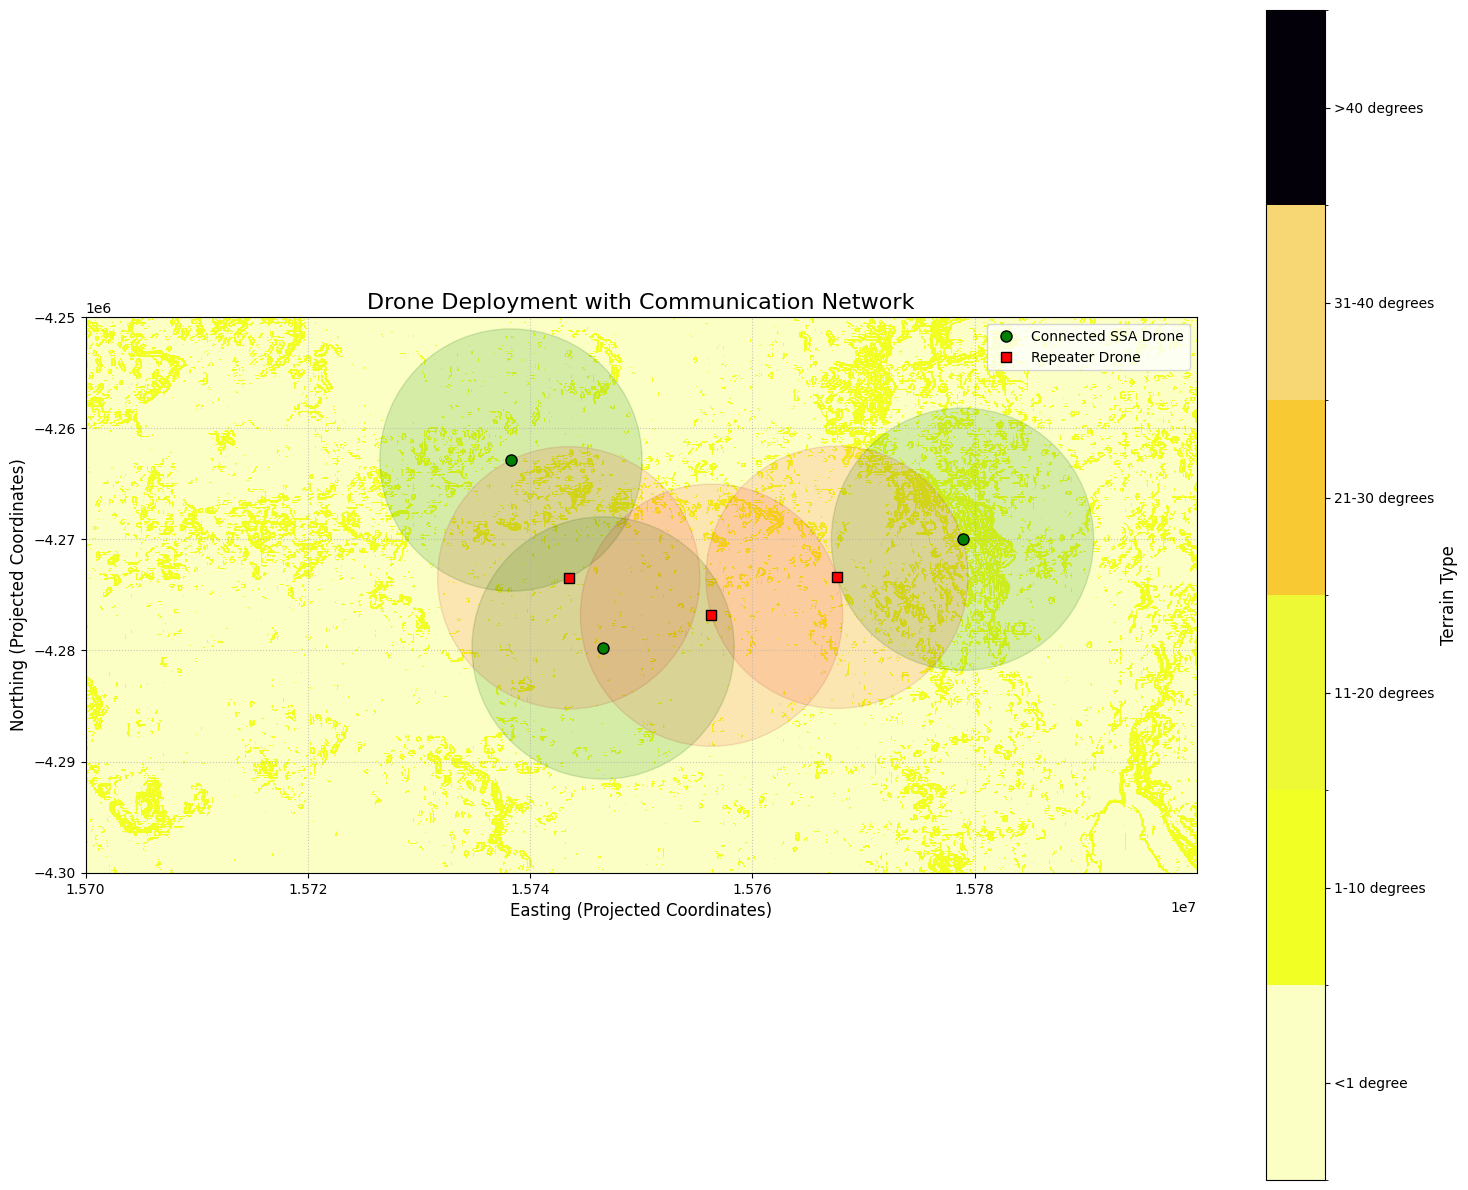

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Create a figure and axes object
plt.figure(figsize=(15, 12))

# Display the terrain classification map as the base layer
plt.imshow(terrain_classification_new, cmap=cmap, norm=norm, origin='upper', interpolation='nearest', extent=plot_extent)

# Add a title to the plot
plt.title('Drone Deployment with Communication Network', fontsize=16)
plt.xlabel('Easting (Projected Coordinates)', fontsize=12)
plt.ylabel('Northing (Projected Coordinates)', fontsize=12)

# Add colorbar for terrain classification
cbar = plt.colorbar(ticks=[0, 1, 2, 3, 4, 5])
cbar.set_ticklabels(['<1 degree', '1-10 degrees', '11-20 degrees', '21-30 degrees', '31-40 degrees', '>40 degrees'])
cbar.set_label('Terrain Type', fontsize=12)

# Plot each connected SSA drone position and its coverage circle
ssa_drones_plotted = False
for i, (drone_x, drone_y) in enumerate(connected_ssa_drones):
    if not ssa_drones_plotted:
        plt.plot(drone_x, drone_y, 'o', color='green', markersize=8, markeredgecolor='black', label='Connected SSA Drone')
        ssa_drones_plotted = True
    else:
        plt.plot(drone_x, drone_y, 'o', color='green', markersize=8, markeredgecolor='black')

    circle = Circle((drone_x, drone_y), communication_radius, facecolor='green', alpha=0.15, edgecolor='darkgreen', linewidth=1)
    plt.gca().add_patch(circle)

# Plot each repeater drone position and its coverage circle
repeater_drones_plotted = False
for i, (drone_x, drone_y) in enumerate(repeater_drones):
    if not repeater_drones_plotted:
        plt.plot(drone_x, drone_y, 's', color='red', markersize=7, markeredgecolor='black', label='Repeater Drone')
        repeater_drones_plotted = True
    else:
        plt.plot(drone_x, drone_y, 's', color='red', markersize=7, markeredgecolor='black')

    circle = Circle((drone_x, drone_y), communication_radius, facecolor='red', alpha=0.1, edgecolor='darkred', linewidth=1)
    plt.gca().add_patch(circle)

# Add a legend
plt.legend(loc='upper right')

plt.grid(True, linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()

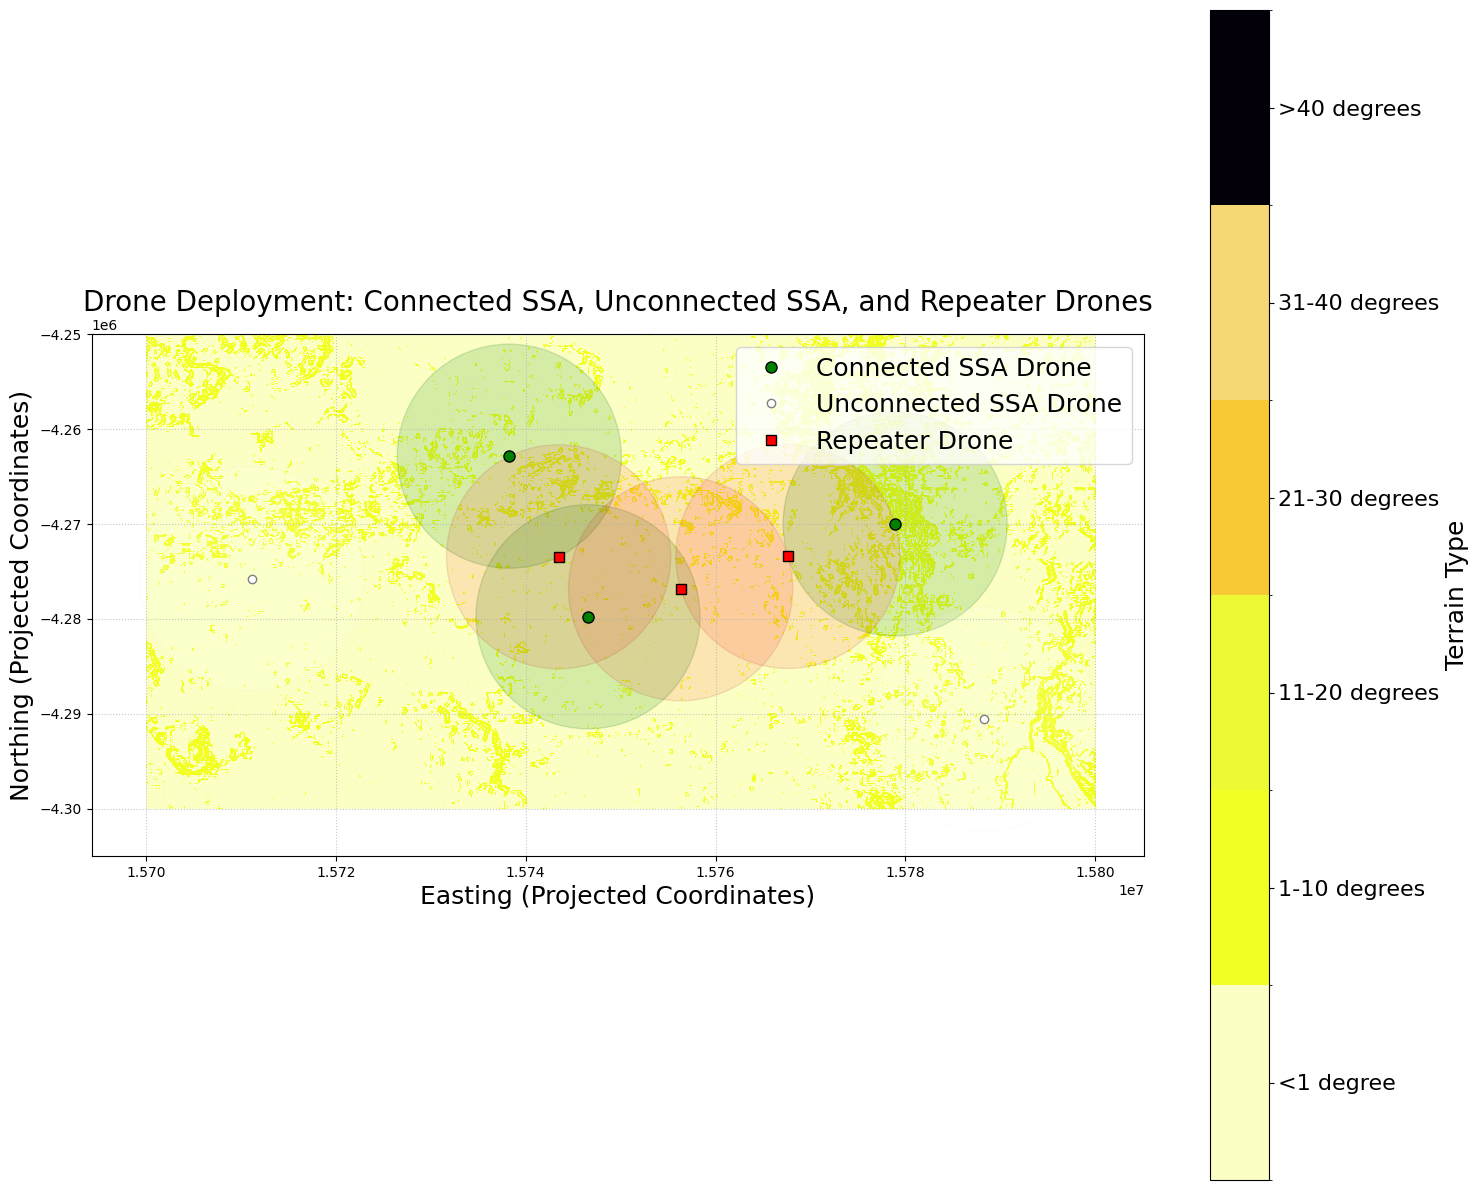

In [ ]:

import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Ensure optimal_drone_coords (initial SSA drones) is available for comparison
# (It should be from previous execution)
initial_ssa_drones = optimal_drone_coords.tolist()

# Identify unconnected SSA drones
# Convert to set for efficient comparison
connected_ssa_set = set(tuple(d) for d in connected_ssa_drones)
initial_ssa_set = set(tuple(d) for d in initial_ssa_drones)
unconnected_ssa_drones = [list(d) for d in initial_ssa_set - connected_ssa_set]

# Create a figure and axes object
plt.figure(figsize=(15, 12))

# Display the terrain classification map as the base layer
plt.imshow(terrain_classification_new, cmap=cmap, norm=norm, origin='upper', interpolation='nearest', extent=plot_extent)

# Add a title to the plot
plt.title('Drone Deployment: Connected SSA, Unconnected SSA, and Repeater Drones', fontsize=20)
plt.xlabel('Easting (Projected Coordinates)', fontsize=18)
plt.ylabel('Northing (Projected Coordinates)', fontsize=18)

# Add colorbar for terrain classification
cbar = plt.colorbar(ticks=[0, 1, 2, 3, 4, 5])
cbar.set_ticklabels(['<1 degree', '1-10 degrees', '11-20 degrees', '21-30 degrees', '31-40 degrees', '>40 degrees'], fontsize = 16)
cbar.set_label('Terrain Type', fontsize=18)

# Plot connected SSA drone positions and their coverage circles
connected_ssa_plotted = False
for drone_x, drone_y in connected_ssa_drones:
    if not connected_ssa_plotted:
        plt.plot(drone_x, drone_y, 'o', color='green', markersize=8, markeredgecolor='black', label='Connected SSA Drone')
        connected_ssa_plotted = True
    else:
        plt.plot(drone_x, drone_y, 'o', color='green', markersize=8, markeredgecolor='black')

    circle = Circle((drone_x, drone_y), communication_radius, facecolor='green', alpha=0.15, edgecolor='darkgreen', linewidth=1)
    plt.gca().add_patch(circle)

# Plot unconnected SSA drone positions and their coverage circles
unconnected_ssa_plotted = False
for drone_x, drone_y in unconnected_ssa_drones:
    if not unconnected_ssa_plotted:
        plt.plot(drone_x, drone_y, 'o', color='white', markersize=6, markeredgecolor='gray', label='Unconnected SSA Drone')
        unconnected_ssa_plotted = True
    else:
        plt.plot(drone_x, drone_y, 'o', color='white', markersize=6, markeredgecolor='gray')

    circle = Circle((drone_x, drone_y), communication_radius, facecolor='white', alpha=0.1, edgecolor='lightgray', linewidth=0.5)
    plt.gca().add_patch(circle)

# Plot repeater drone positions and their coverage circles
repeater_drones_plotted = False
for drone_x, drone_y in repeater_drones:
    if not repeater_drones_plotted:
        plt.plot(drone_x, drone_y, 's', color='red', markersize=7, markeredgecolor='black', label='Repeater Drone')
        repeater_drones_plotted = True
    else:
        plt.plot(drone_x, drone_y, 's', color='red', markersize=7, markeredgecolor='black')

    circle = Circle((drone_x, drone_y), communication_radius, facecolor='red', alpha=0.1, edgecolor='darkred', linewidth=1)
    plt.gca().add_patch(circle)

# Add a legend
plt.legend(loc='upper right', fontsize=18)

plt.grid(True, linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2293208429.py:26: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = Circle((drone_x, drone_y), drone_coverage_radius_meters, color='white', alpha=0.2, edgecolor='red', linewidth=1.5)


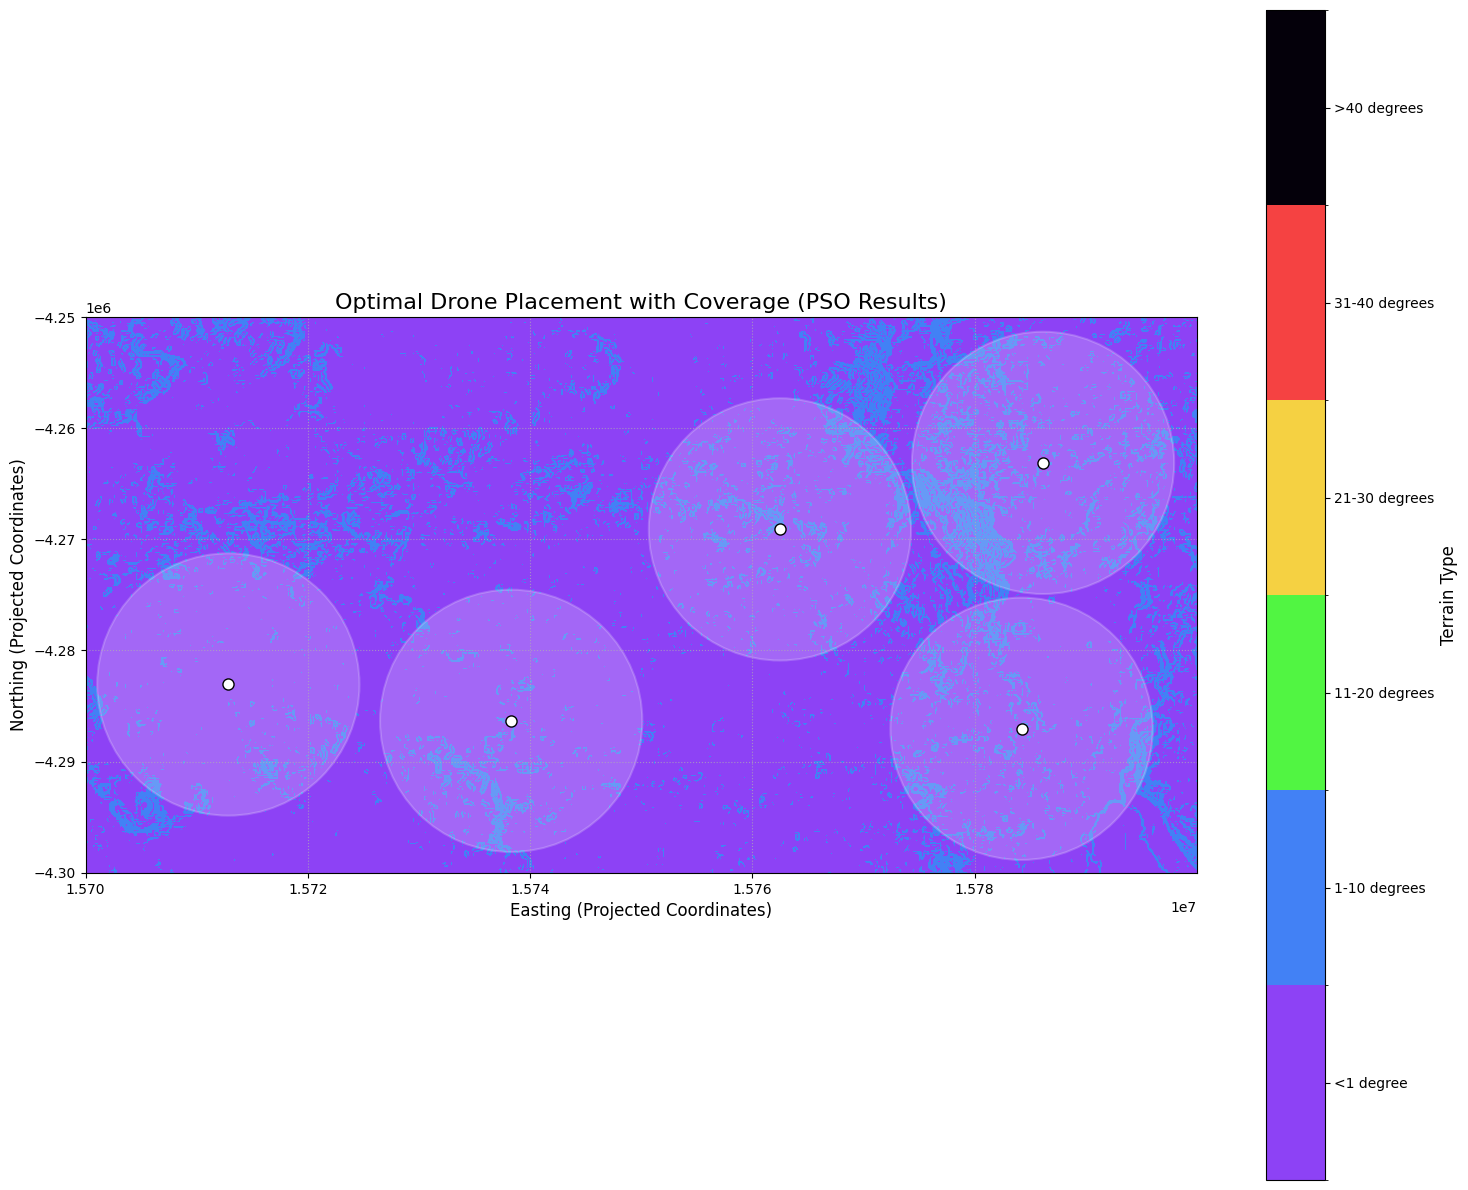

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Create a figure and axes object
plt.figure(figsize=(15, 12))

# Display the terrain classification map as the base layer
plt.imshow(terrain_classification_new, cmap=cmap, norm=norm, origin='upper', interpolation='nearest', extent=plot_extent)

# Add a title to the plot
plt.title('Optimal Drone Placement with Coverage (PSO Results)', fontsize=20)
plt.xlabel('Easting (Projected Coordinates)', fontsize=16)
plt.ylabel('Northing (Projected Coordinates)', fontsize=16)

# Add colorbar for terrain classification
cbar = plt.colorbar(ticks=[0, 1, 2, 3, 4, 5])
cbar.set_ticklabels(['<1 degree', '1-10 degrees', '11-20 degrees', '21-30 degrees', '31-40 degrees', '>40 degrees'])
cbar.set_label('Terrain Type', fontsize=16)

# Plot each optimal drone position and its coverage circle
for i, (drone_x, drone_y) in enumerate(optimal_drone_coords):
    # Plot the drone's position
    plt.plot(drone_x, drone_y, 'o', color='white', markersize=8, markeredgecolor='black', label=f'Drone {i+1} Position')

    # Plot the drone's coverage area as a circle
    circle = Circle((drone_x, drone_y), drone_coverage_radius_meters, color='white', alpha=0.2, edgecolor='red', linewidth=1.5)
    plt.gca().add_patch(circle)

plt.grid(True, linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()

## Summary:

### Q&A
The percentages of flat, moderately hilly, and very hilly land in the GeoTIFF are:
*   **Flat land:** 51.71%
*   **Moderately Hilly land:** 23.19%
*   **Very Hilly land:** 25.10%

### Data Analysis Key Findings
*   Elevation data was successfully extracted from the GeoTIFF file, revealing a shape of (22712, 31441) pixels, a CRS of `EPSG:3857`, and a pixel resolution of approximately 33.01 units.
*   Slope was calculated for each pixel, ranging from a minimum of 0.00 degrees to a maximum of 57.28 degrees, with a mean slope of 3.66 degrees.
*   The terrain was classified into three categories based on slope thresholds: 'flat' (0 to <1 degree), 'moderately hilly' (1 to <4 degrees), and 'very hilly' (4 degrees and above).
*   The pixel counts for each category were: 168,667,585 flat pixels, 75,645,938 moderately hilly pixels, and 81,855,295 very hilly pixels.
*   The final percentages showed that over half of the land (51.71%) is classified as flat, with the remaining area almost equally split between moderately hilly (23.19%) and very hilly (25.10%) terrain.
*   A visualization of the terrain classification was generated, clearly depicting the distribution of flat, moderately hilly, and very hilly areas using distinct colors.

### Insights or Next Steps
*   The high percentage of flat land suggests suitability for various developments or agricultural activities, while the significant portion of very hilly land might indicate areas prone to erosion or suitable for specific ecological conservation efforts.
*   Further analysis could involve overlaying this terrain classification with other geospatial data (e.g., land use, population density, hydrological features) to understand correlations and support regional planning or environmental impact assessments.

### Prompt
*   Please summarize the findings from the analysis of the steepness of the hills, including the percentage of flat (less than 1 percent slope), moderately hilly (1 to 4 degrees), and very hilly land (over 4 degrees). Summarize the data analysis and key findings, and return the prompt at the end.